# Diabetes Prediction Using Machine Learning

# Introduction
Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy. Your body breaks down most of the food you eat into sugar (glucose) and releases it into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Diabetes is the fast growing disease among the people even among the youngsters. In understanding diabetes and how it develops, we need to understand what happens in the body without diabetes. Sugar (glucose) comes from the foods that we eat, specifically carbohydrate foods. Carbohydrate foods provide our body with its main energy source everybody, even those people with diabetes, needs carbohydrate.

In [1]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read data

In [2]:
w=pd.read_csv(r"C:\Users\mayur\OneDrive\Documents\diabetes_prediction_dataset edubridge.csv")


In [3]:
w.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
w.shape

(100000, 9)

In [5]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
w.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [7]:
w.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
w.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Missing Value Handling

In [9]:
w.isnull().sum()  

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
w.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

# labelencoder method

In [11]:
#labelencoder method
from sklearn.preprocessing import LabelEncoder   #convert categorical value to numerical value
le=LabelEncoder()

In [12]:
w.smoking_history=le.fit_transform(w.smoking_history)

In [13]:
w.gender=le.fit_transform(w.gender)

In [14]:
w.dtypes

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [15]:
w.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


# Exploratory Data Analysis(EDA)

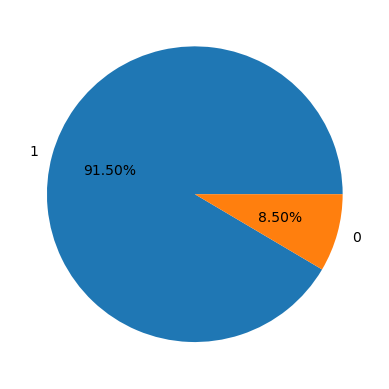

In [16]:
plt.pie(w['diabetes'].value_counts().values,labels=[1,0],autopct='%2.2f%%')
plt.show()

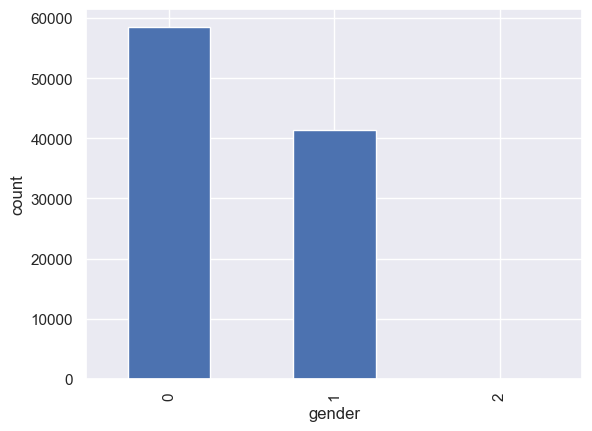

In [17]:
sns.set()
gender_plot=w['gender'].value_counts().plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

# Correlation Matrix

In [18]:
w_corr=w.corr()

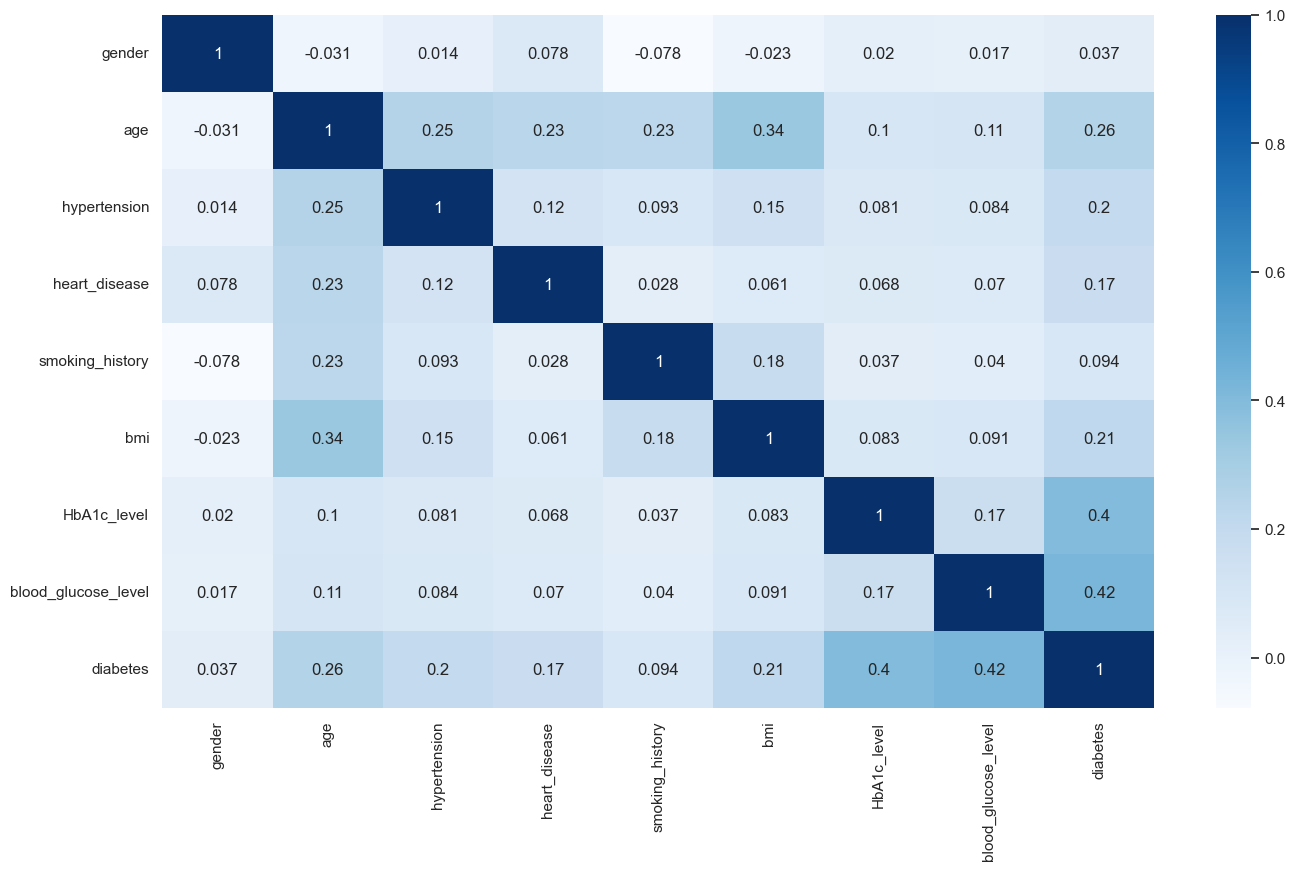

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(w_corr,annot=True,cmap="Blues")
plt.show()

In [20]:
w.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


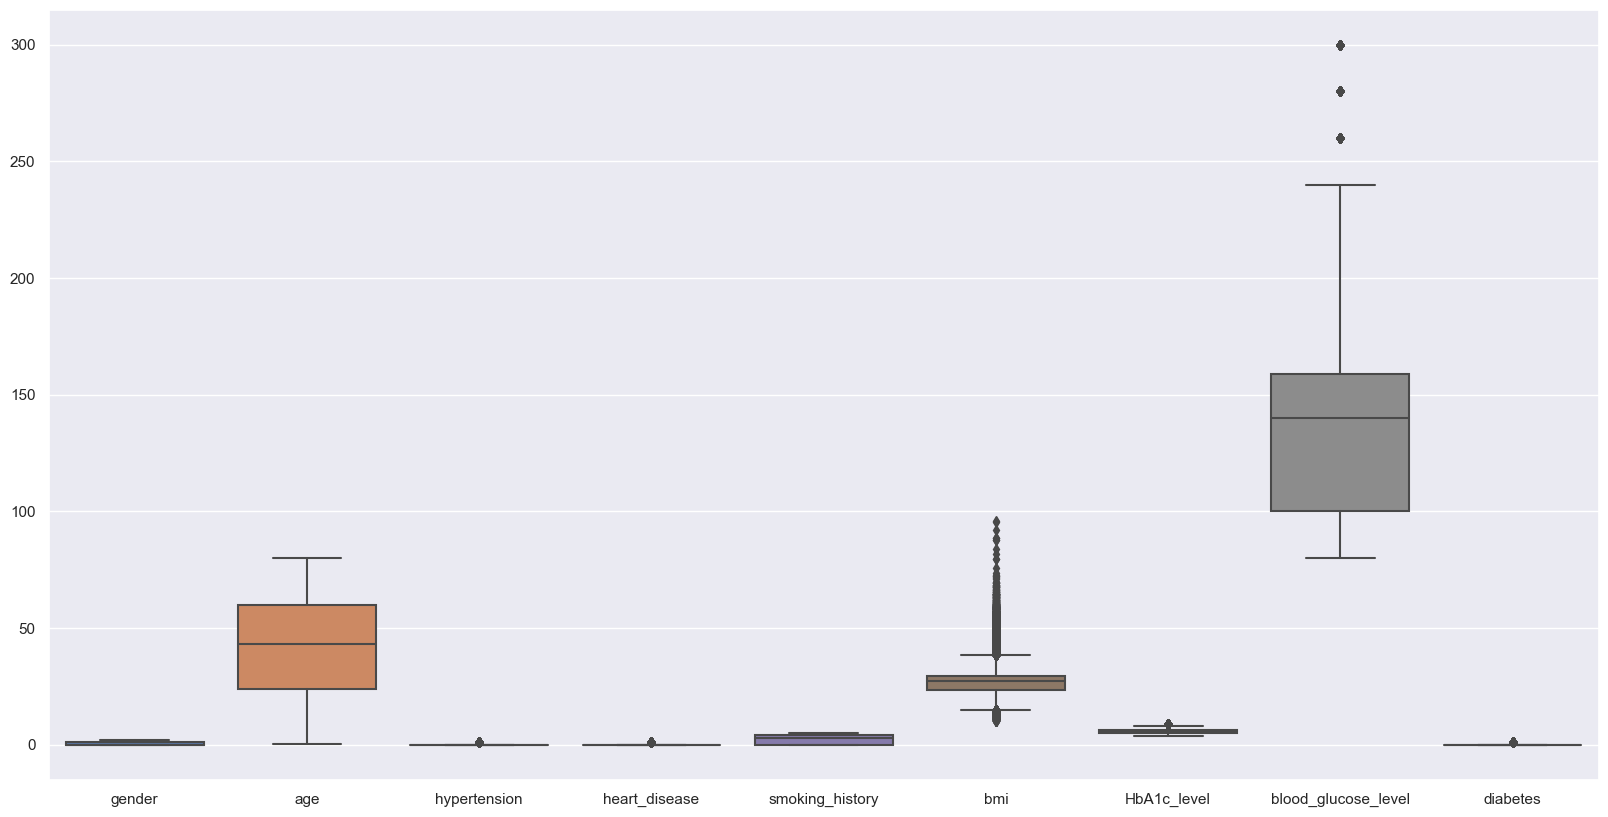

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(data=w)
plt.show()

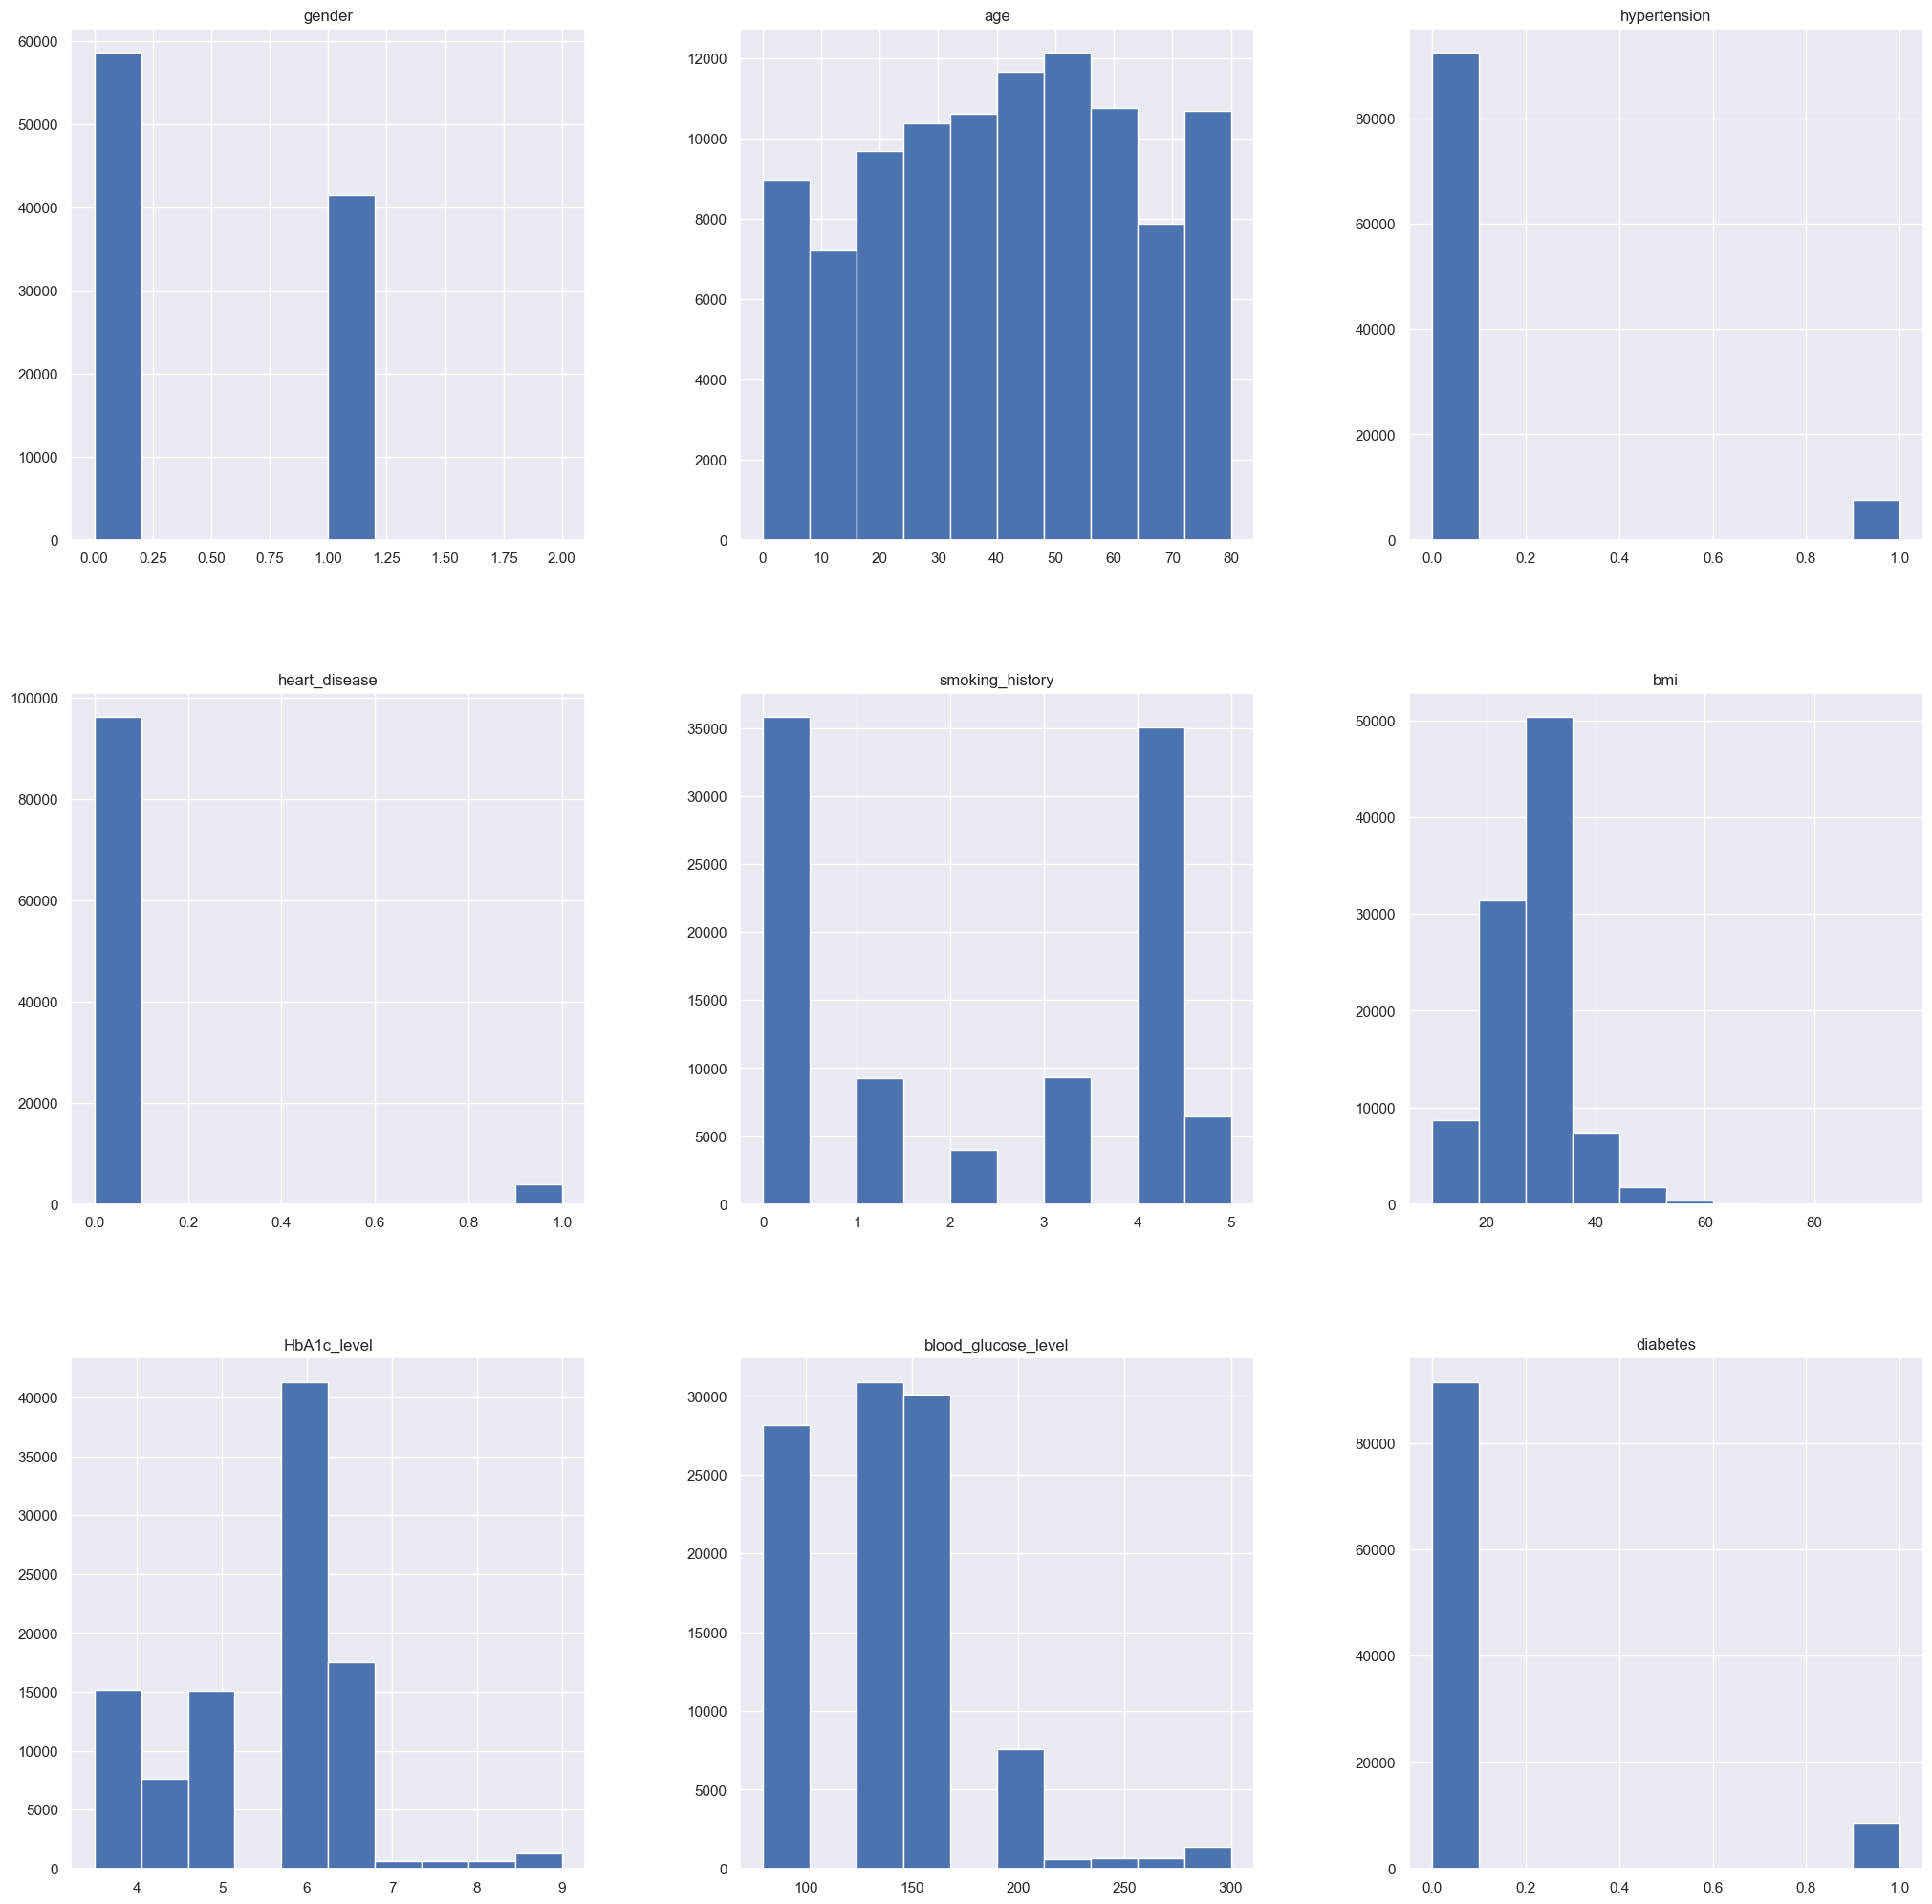

In [22]:
w.hist(figsize=(25,25))
plt.show()

In [23]:
w.age.describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [24]:
w.age.value_counts()

80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

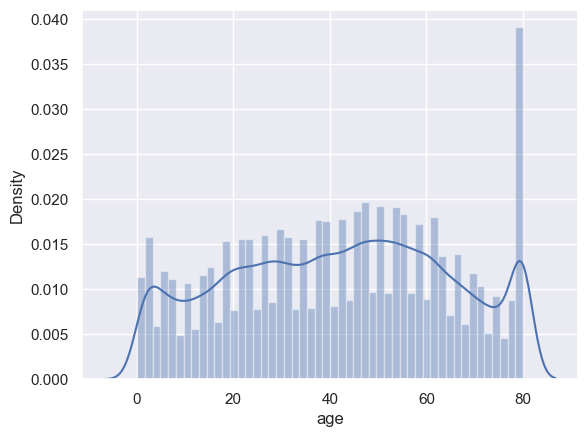

In [25]:
sns.distplot(w.age)

<function matplotlib.pyplot.show(close=None, block=None)>

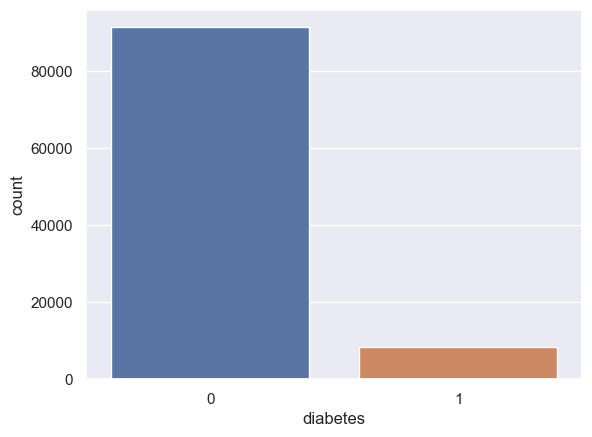

In [27]:
sns.countplot(w["diabetes"])
plt.show

In [28]:
w.gender.value_counts()[0:10]

0    58552
1    41430
2       18
Name: gender, dtype: int64

# statistical Analysis

In [29]:
test=pd.read_csv(r"C:\Users\mayur\OneDrive\Documents\diabetes_prediction_dataset edubridge.csv")
test.shape

(100000, 9)

In [30]:
test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [31]:
test.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [32]:
w_x=w.iloc[:,1:-1]
w_y=w.iloc[:,-1]
test_x=test.iloc[:,0:]  #here test data is not having target col

In [33]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [34]:
lg.fit(w_x,w_y)

LogisticRegression()

# Split the data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_tr,x_te,y_tr,y_te=train_test_split(w_x,w_y,test_size=0.2,random_state=100)

In [37]:
#Function for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(plt_title)
    plt.show()
    return cm

# 1)Logistic Regression
The logistic regression statistics modeling technique is used when we have a binary outcome variable.
Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e., binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.
The name “logistic regression” is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.


In [174]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [40]:
lg_p1=lg.predict(x_te)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
cf1=confusion_matrix(lg_p1,y_te)
cf1

array([[18076,   646],
       [  251,  1027]], dtype=int64)

In [43]:
acc1=cf1.diagonal().sum()/cf1.sum()*100
acc1

95.515

In [44]:
print(classification_report(lg_p1,y_te))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18722
           1       0.61      0.80      0.70      1278

    accuracy                           0.96     20000
   macro avg       0.80      0.88      0.84     20000
weighted avg       0.96      0.96      0.96     20000



# Conclusion: 
Logistic model gives 96% accuracy

# 2)Decision Tree


Decision Tree is the most powerful and popular tool for classification and prediction. Decision tree is type of supervised machine learning where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decision or final outcomes. And the decision nodes are where the data is split.  
Decision tree can become much more powerful when used as ensembles. Ensembles is clever way of combining decision trees to create more powerful model. These ensembles create the state-of-the-Art Machine Learning Algorithms that can outperform neural network in some cases. 


In [130]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [131]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [132]:
dt_p=dt.predict(x_te)

In [133]:
dt_m=confusion_matrix(dt_p,y_te)
dt_m

array([[17857,   430],
       [  470,  1243]], dtype=int64)

In [134]:
dt_m=confusion_matrix(y_pred_dtc,y_te)
dt_m

array([[17858,   436],
       [  469,  1237]], dtype=int64)

In [135]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

95.475

Decision Tree Classifier Accuracy Score:  0.95475
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18327
           1       0.73      0.74      0.73      1673

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.96      0.95      0.95     20000



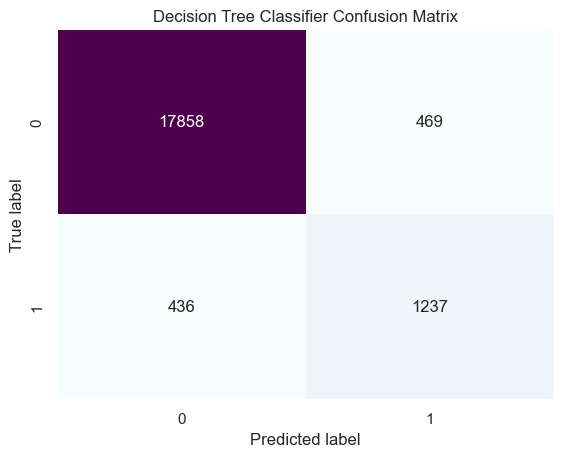

In [48]:
print('Decision Tree Classifier Accuracy Score: ',accuracy_score(y_te,y_pred_dtc))
cm_dtc=my_confusion_matrix(y_te, y_pred_dtc, 'Decision Tree Classifier Confusion Matrix')

# Conclusion:
Decision Tree gives 95% accuracy.

# 3)Random Forest 
Random forest is a popular machine learning algorithm that belongs to the supervised learning technique. 
It can be used for both classification and regression problem. In Machine learning. It is based on concept of ensembles learning. Which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model. As the name suggests, “Random Forest is a classifier that contain a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of the dataset”. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predict the final output.

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [137]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [138]:
rf_p=rf.predict(x_te)
rf_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
rf_cf=confusion_matrix(rf_p,y_te)
rf_cf

array([[18241,   511],
       [   86,  1162]], dtype=int64)

In [140]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

97.015

In [142]:
y_pred_rfc=rf.predict(x_te)

Random Forest Classifier Accuracy Score:  0.9728
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18327
           1       1.00      0.67      0.81      1673

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



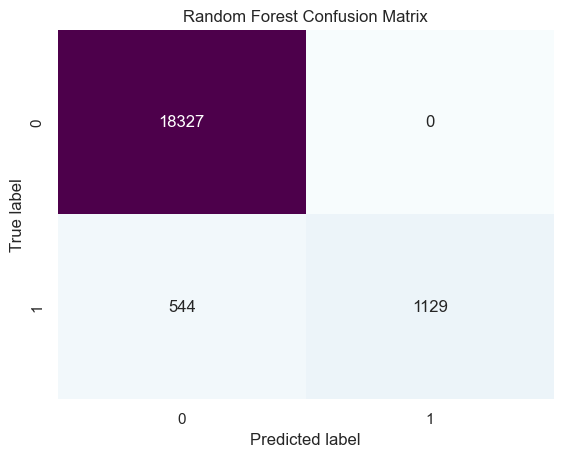

In [52]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_te,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_te, y_pred_rfc, 'Random Forest Confusion Matrix')

# Conclusion:
Random forest gives 97% accuracy

# 4)SVM Classifier
A support vector machine (SVM) is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups.SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane.

In [143]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(x_tr, y_tr)

SVC(decision_function_shape='ovo')

In [144]:
y_pred_svm=svm_clf.predict(x_te)

In [146]:
svc_m=confusion_matrix(y_pred_svm,y_te)
svc_m

array([[18327,   994],
       [    0,   679]], dtype=int64)

In [147]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

95.03

SVM Classifier Accuracy Score:  0.9503
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18327
           1       1.00      0.41      0.58      1673

    accuracy                           0.95     20000
   macro avg       0.97      0.70      0.78     20000
weighted avg       0.95      0.95      0.94     20000



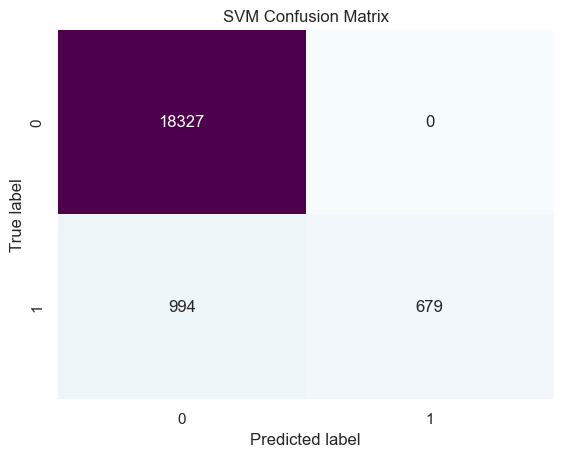

In [55]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_te,y_pred_svm))
cm_svm=my_confusion_matrix(y_te, y_pred_svm, 'SVM Confusion Matrix')

# Conclusion:
SVM gives 95% accuracy.

# 5)Naive Bayes

In [115]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [116]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [117]:
n_p=nb.predict(x_te)

In [118]:
n_m=confusion_matrix(n_p,y_te)
n_m

array([[17620,  1219],
       [  707,   454]], dtype=int64)

In [119]:
n_acc=n_m.diagonal().sum()/n_m.sum()*100
n_acc

90.36999999999999

In [120]:
print(classification_report(n_p,y_te))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     18839
           1       0.27      0.39      0.32      1161

    accuracy                           0.90     20000
   macro avg       0.62      0.66      0.63     20000
weighted avg       0.92      0.90      0.91     20000



# Conclusion:
Naive Bayes gives 90% accuracy.

# Final analysis of all Algorithum.

In [152]:
list1=["Logistic Regression","Decision Tree","Random forest","SVM","Naive Bayes"]
list2=[acc1,dt_acc,rf_acc,svc_acc,n_acc]

In [153]:
ac=pd.DataFrame({"Model Name":list1,"Accuracy":list2})
ac

,Model Name,Accuracy
0,Logistic Regression,95.515
1,Decision Tree,95.475
2,Random forest,97.015
3,SVM,95.030
4,Naive Bayes,90.370


# we can see the all algorithum,accuracy is over or Baised then using the Random oversampling.

# Classimbalance
# Random OverSampling

In [154]:
c_0,c_1=w["diabetes"].value_counts()
c_0,c_1

(91500, 8500)

In [155]:
df_0=w[w["diabetes"]==0]
df_1=w[w["diabetes"]==1]

In [58]:
df_0.shape,df_1.shape

((91500, 9), (8500, 9))

In [59]:
class_1over=df_1.sample(c_0,replace=True)

In [60]:
class1_0=pd.concat([class_1over,df_0],axis=0)

In [61]:
class1_0.shape

(183000, 9)

In [62]:
class1_0.diabetes.value_counts()

1    91500
0    91500
Name: diabetes, dtype: int64

In [63]:
o_x=class1_0.iloc[:,0:-1]
o_y=class1_0.iloc[:,-1]

In [64]:
o_x_train,o_x_test,o_y_train,o_y_test=train_test_split(o_x,o_y,test_size=0.2,random_state=100)
o_x_train.shape,o_x_test.shape,o_y_train.shape,o_y_test.shape

((146400, 8), (36600, 8), (146400,), (36600,))

 # Logistic Regression with Random Oversampling

In [65]:
lg.fit(o_x_train,o_y_train)

LogisticRegression()

In [66]:
lg_op=lg.predict(o_x_test)

In [67]:
lg_ocf=confusion_matrix(lg_op,o_y_test)
lg_ocf

array([[16125,  3046],
       [ 2207, 15222]], dtype=int64)

In [68]:
lg_oacc=lg_ocf.diagonal().sum()/lg_ocf.sum()*100
lg_oacc

85.64754098360656

In [69]:
print(classification_report(lg_op,o_y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     19171
           1       0.83      0.87      0.85     17429

    accuracy                           0.86     36600
   macro avg       0.86      0.86      0.86     36600
weighted avg       0.86      0.86      0.86     36600



# Conclusion: 
Logistic model gives 86% accuracy

# Decision Tree with Random Oversampling

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier()
dtc.fit(o_x_train,o_y_train)

DecisionTreeClassifier()

In [71]:
dt_op=dtc.predict(o_x_test)

In [72]:
dt_ocf=confusion_matrix(dt_op,o_y_test)
dt_ocf

array([[17754,     6],
       [  578, 18262]], dtype=int64)

In [73]:
dt_oacc=dt_ocf.diagonal().sum()/dt_ocf.sum()*100
dt_oacc

98.40437158469946

In [74]:
print(classification_report(dt_op,o_y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17760
           1       1.00      0.97      0.98     18840

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600



# Conclusion: 
Decision tree model gives 98% accuracy

# Random Forest with Over Sampling

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)
rfc.fit(o_x_train,o_y_train)

RandomForestClassifier(max_depth=7, max_features=15, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200, random_state=7)

In [76]:
rf_op=rfc.predict(o_x_test)

In [77]:
rf_ocf=confusion_matrix(rf_op,o_y_test)
rf_ocf

array([[15889,  1181],
       [ 2443, 17087]], dtype=int64)

In [78]:
rf_oacc=rf_ocf.diagonal().sum()/rf_ocf.sum()*100
rf_oacc

90.09836065573771

In [79]:
print(classification_report(rf_op,o_y_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     17070
           1       0.94      0.87      0.90     19530

    accuracy                           0.90     36600
   macro avg       0.90      0.90      0.90     36600
weighted avg       0.90      0.90      0.90     36600



# Conclusion: 
Random forest model gives 90% accuracy.

# SVM with Over Sampling

In [106]:
svc.fit(o_x_train,o_y_train)

SVC()

In [121]:
s_op=svc.predict(o_x_test)
s_op

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [124]:
s_ocf=confusion_matrix(s_op,o_y_test)
s_ocf

array([[15963,  1538],
       [ 2369, 16730]], dtype=int64)

In [125]:
s_oacc=s_ocf.diagonal().sum()/s_ocf.sum()*100
s_oacc

89.32513661202186

In [126]:
print(classification_report(s_op,o_y_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     17501
           1       0.92      0.88      0.90     19099

    accuracy                           0.89     36600
   macro avg       0.89      0.89      0.89     36600
weighted avg       0.89      0.89      0.89     36600



# Conclusion: 
SVM model gives 89% accuracy.

# Naive Bayes with Over sampling

In [156]:
nb.fit(o_x_train,o_y_train)

MultinomialNB()

In [157]:
n_op=nb.predict(o_x_test)

In [158]:
n_ocf=confusion_matrix(n_op,o_y_test)
n_ocf

array([[12204,  5887],
       [ 6128, 12381]], dtype=int64)

In [159]:
n_oacc=n_ocf.diagonal().sum()/n_ocf.sum()*100
n_oacc

67.17213114754098

In [160]:
print(classification_report(n_op,o_y_test))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67     18091
           1       0.68      0.67      0.67     18509

    accuracy                           0.67     36600
   macro avg       0.67      0.67      0.67     36600
weighted avg       0.67      0.67      0.67     36600



# Conclusion: 
Naivy Bayes model gives 67% accuracy.

# Final All Algorithum Analysis.

In [161]:
list1=["Logistic Regression","Decision Tree","Random forest","SVM","Naivy Bayes"]
list2=[lg_oacc,dt_oacc,rf_oacc,s_oacc,n_oacc]

In [162]:
ac=pd.DataFrame({"Model Name":list1,"Accuracy":list2})
ac

,Model Name,Accuracy
0,Logistic Regression,85.647541
1,Decision Tree,98.404372
2,Random forest,90.098361
3,SVM,89.325137
4,Naivy Bayes,67.172131


# Class is balance then analysis the Algorithum.

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [81]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [82]:
lg_p=lg.predict(x_te)

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [84]:
lg_cf=confusion_matrix(lg_p,y_te)
lg_cf

array([[18076,   646],
       [  251,  1027]], dtype=int64)

In [85]:
lg_ac=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_ac

95.515

In [86]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18722
           1       0.61      0.80      0.70      1278

    accuracy                           0.96     20000
   macro avg       0.80      0.88      0.84     20000
weighted avg       0.96      0.96      0.96     20000



# Conclusion: 
Logistic model gives 96% accuracy

# Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [88]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [89]:
dt_p=dt.predict(x_te)

In [90]:
dt_cf=confusion_matrix(dt_p,y_te)
dt_cf

array([[17861,   428],
       [  466,  1245]], dtype=int64)

In [91]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

95.53

In [92]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18289
           1       0.74      0.73      0.74      1711

    accuracy                           0.96     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.95      0.96      0.96     20000



# Conclusion: 
Decision Tree model gives 96% accuracy.

# Random forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [94]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [95]:
rf_p=rf.predict(x_te)
rf_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
rf_cf=confusion_matrix(rf_p,y_te)
rf_cf

array([[18244,   503],
       [   83,  1170]], dtype=int64)

In [97]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

97.07000000000001

In [98]:
print(classification_report(rf_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18747
           1       0.70      0.93      0.80      1253

    accuracy                           0.97     20000
   macro avg       0.85      0.95      0.89     20000
weighted avg       0.98      0.97      0.97     20000



# Conclusion: 
Random Forest model gives 97% accuracy.

# SVM

In [99]:
from sklearn.svm import SVC
svc=SVC()

In [100]:
svc.fit(x_tr,y_tr)

SVC()

In [101]:
s_p=svc.predict(x_te)
s_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
cf_s=confusion_matrix(s_p,y_te)
cf_s

array([[18327,   994],
       [    0,   679]], dtype=int64)

In [103]:
acc_s=cf_s.diagonal().sum()/cf_s.sum()*100
acc_s

95.03

In [104]:
print(classification_report(s_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     19321
           1       0.41      1.00      0.58       679

    accuracy                           0.95     20000
   macro avg       0.70      0.97      0.78     20000
weighted avg       0.98      0.95      0.96     20000



# Conclusion: 
SVM model gives 95% accuracy.

# Naivy Bayes

In [163]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [164]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [165]:
n_p=nb.predict(x_te)

In [166]:
nc=confusion_matrix(n_p,y_te)
nc

array([[17620,  1219],
       [  707,   454]], dtype=int64)

In [167]:
acc_n=nc.diagonal().sum()/nc.sum()*100
acc_n

90.36999999999999

In [168]:
print(classification_report(n_p,y_te))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     18839
           1       0.27      0.39      0.32      1161

    accuracy                           0.90     20000
   macro avg       0.62      0.66      0.63     20000
weighted avg       0.92      0.90      0.91     20000



# Conclusion: 
Naivy Bayes model gives 90% accuracy.

# Conclusion

In [169]:
list1=["Logistic Regression","Decision Tree","Random forest","SVM","Naivy Bayes"]
list2=[lg_ac,dt_acc,rf_acc,acc_s,acc_n]

In [170]:
ac=pd.DataFrame({"Model Name":list1,"Accuracy":list2})
ac

,Model Name,Accuracy
0,Logistic Regression,95.515
1,Decision Tree,95.475
2,Random forest,97.015
3,SVM,95.030
4,Naivy Bayes,90.370


# Conclusion-
From exploratory data analysis we observe that number of male are more diabetes as compare to female.
hypertension,heart_disease,HbA1c_level,blood_glucose_level symtoms are most affect on the Diabetes Patient.
From statistical models we observe that the Random Forest and Logistic regression shows more accuracy.
Due to high performance of Specificity and Sensitivity Decision Tree and Random Forest are the best fit models in these diabetes dataset.
